# Simple Pipeline Demonstration

### Load data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/credit.csv')
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


### Split off target from features

In [2]:
y = df['Income']
X = df[[x for x in df.columns if x != 'Income']]
X.head()

,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,3606,283,2,34,11,No,No,Yes,South,333
1,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,7075,514,4,71,11,No,No,No,West,580
3,9504,681,3,36,11,Yes,No,No,West,964
4,4897,357,2,68,16,No,No,Yes,South,331


### Create pipeline for feature processing
- Not including all features

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

cat_vars = ['Own', 'Student']
num_vars = ['Limit', 'Balance']

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', cat_pipeline, cat_vars)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['Limit', 'Balance']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Own', 'Student'])])


### Fit model

In [4]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline),
                              ('lm', LinearRegression())])
modeling_pipeline.fit(X, y)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['Limit', 'Balance']),
                                                 ('create_dummies',
                                                  Pipeline(steps=[('impute_missing_cats',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
            

### Show Predictions

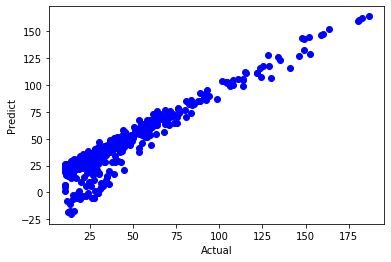

In [5]:
yhat = modeling_pipeline.predict(X)

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(y, yhat, 'bo')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.show()